In [1]:
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn.linear_model import LinearRegression

URL = 'https://top500.org/statistics/perfdevel/'

# Предварительный парсинг сайта

In [2]:
html_doc = requests.get(URL).text

soup = BeautifulSoup(html_doc, 'html.parser')

results = soup.findAll("script", {"type": 'text/javascript'})
for script in results:
    if 'dataTable' in str(script):
        result = str(script)

result = result.split('dataTable.addRows')[1]
result = result.split('var options')[0]

In [3]:
print(result)

([
            
                      [   new Date(1993, 5, 1),
                          1128.57,
                          "06/1993: Sum = 1.1 TFlop/s",
                          59.70,
                          "06/1993: #1 = 59.7 GFlop/s",
                          0.42,
                          "06/1993: #500 = 0.4 GFlop/s"],
             
                      [   new Date(1993, 10, 1),
                          1493.35,
                          "11/1993: Sum = 1.5 TFlop/s",
                          124.00,
                          "11/1993: #1 = 124.0 GFlop/s",
                          0.47,
                          "11/1993: #500 = 0.5 GFlop/s"],
             
                      [   new Date(1994, 5, 1),
                          2317.01,
                          "06/1994: Sum = 2.3 TFlop/s",
                          143.40,
                          "06/1994: #1 = 143.4 GFlop/s",
                          0.84,
                          "06/1994: #500 = 0.8 GFlop/s"

In [4]:
data = {
    'date': [],
    'sum': [],
    '#1': [],
    '#500': []
}

for x in result.split('new Date')[1:]:
    for i, row in enumerate(x.split('\n')):
      row = row.strip()
      if i == 0:
          row = row[1:-2]
          row = map(int, row.split(', '))
          data['date'].append(datetime(*row))
      elif i == 1:
          data['sum'].append(float(row[:-1]))
      elif i == 3:
          data['#1'].append(float(row[:-1]))
      elif i == 5:
          data['#500'].append(float(row[:-1]))

data = pd.DataFrame(data)

In [5]:
data

,date,sum,#1,#500
0,1993-05-01,1.128570e+03,5.970000e+01,0.42
1,1993-10-01,1.493350e+03,1.240000e+02,0.47
2,1994-05-01,2.317010e+03,1.434000e+02,0.84
3,1994-10-01,2.732240e+03,1.700000e+02,1.16
4,1995-05-01,3.927000e+03,1.700000e+02,1.96
5,1995-10-01,4.784340e+03,1.700000e+02,2.49
6,1996-05-01,5.892240e+03,2.204000e+02,3.31
7,1996-10-01,7.981240e+03,3.682000e+02,4.62
8,1997-05-01,1.284419e+04,1.068000e+03,7.67
9,1997-10-01,1.689812e+04,1.338000e+03,9.51


# Задание 1
На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

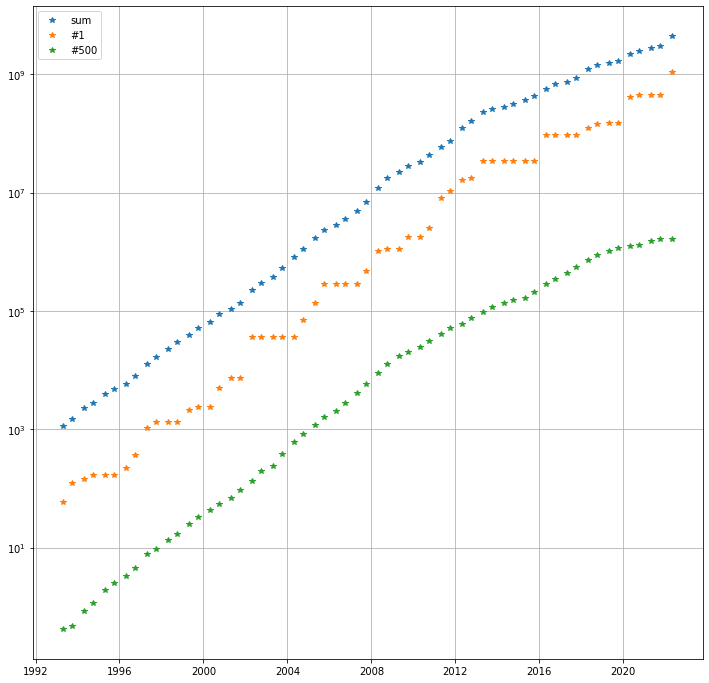

In [6]:
plt.figure(figsize=(12, 12))
plt.plot(data['date'], data[['sum', '#1', '#500']], '*')
plt.yscale('log')
plt.grid()
plt.legend(['sum', '#1', '#500'])
plt.show()

В логарифмическом масштабе все три кривые напоминают линейную зависимость, поэтому обучим линейную регрессию на логарифме таргета

In [7]:
data['log_#1'] = np.log(data['#1'])
data['log_#500'] = np.log(data['#500'])
data['log_sum'] = np.log(data['sum'])

data['date_for_model'] = pd.to_datetime(data['date'])
data['date_for_model'] = data['date_for_model'].map(datetime.toordinal)

lr_num1 = LinearRegression().fit(data[['date_for_model']], data['log_#1'])
lr_num500 = LinearRegression().fit(data[['date_for_model']], data['log_#500'])
lr_sum = LinearRegression().fit(data[['date_for_model']], data['log_sum'])

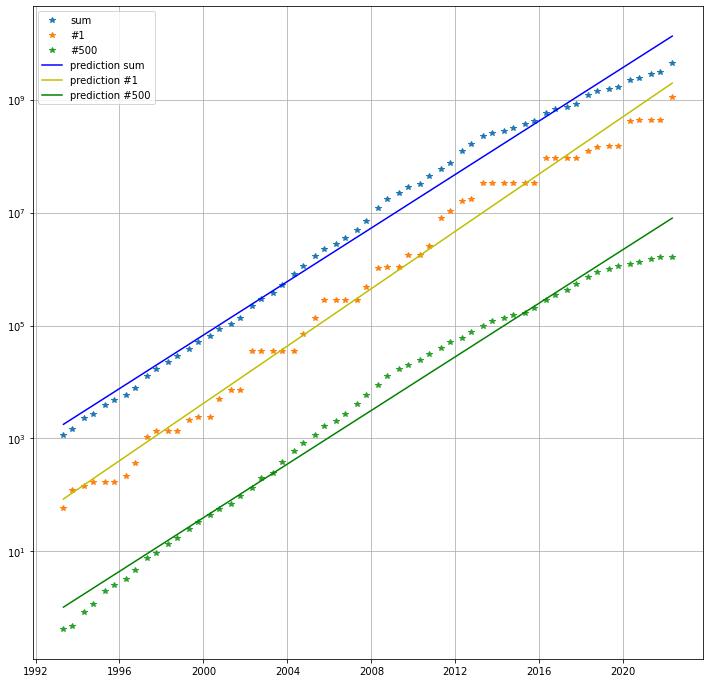

In [8]:
plt.figure(figsize=(12, 12))
plt.plot(data['date'], data[['sum', '#1', '#500']], '*',)
plt.plot(data['date'], np.exp(lr_sum.predict(data[['date_for_model']])), 'b')
plt.plot(data['date'], np.exp(lr_num1.predict(data[['date_for_model']])), 'y')
plt.plot(data['date'], np.exp(lr_num500.predict(data[['date_for_model']])), 'g')
plt.yscale('log')
plt.grid()
plt.legend(['sum', '#1', '#500', 'prediction sum', 'prediction #1', 'prediction #500'])
plt.show()

In [9]:
test = pd.DataFrame({'date_for_model': datetime(2025, 1, 1)}, index=[1])
test['date_for_model'] = pd.to_datetime(test['date_for_model'])
test['date_for_model'] = test['date_for_model'].map(datetime.toordinal)

prediction_num1 = np.exp(lr_num1.predict(test))[0] * 1e-9
prediction_num500 = np.exp(lr_num500.predict(test))[0] * 1e-9
prediction_sum = np.exp(lr_sum.predict(test))[0] * 1e-9

print(f'Предсказание мощности суперкомпьютера #1 на 01.01.2025: {prediction_num1:.3} EFlop/s')
print(f'Предсказание мощности суперкомпьютера #500 на 01.01.2025: {prediction_num500:.3} EFlop/s')
print(f'Предсказание суммарной мощности топ500 суперкомпьютеров на 01.01.2025: {prediction_sum:.3} EFlop/s')

Предсказание мощности суперкомпьютера #1 на 01.01.2025: 9.34 EFlop/s
Предсказание мощности суперкомпьютера #500 на 01.01.2025: 0.0343 EFlop/s
Предсказание суммарной мощности топ500 суперкомпьютеров на 01.01.2025: 57.2 EFlop/s


# Задание 2
оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [10]:
df = pd.read_csv('TOP500_202206.csv')
df.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,NaN,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,"48,553",180047
1,2,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,"50,831",179807
2,3,NaN,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2022,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,"50,908",180048
3,4,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,"48,553",179397
4,5,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,"49,763",179398


In [11]:
df.columns

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory',
       'Architecture', 'Processor', 'Processor Technology',
       'Processor Speed (MHz)', 'Operating System', 'OS Family',
       'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation',
       'System Model', 'System Family', 'Interconnect Family', 'Interconnect',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

In [12]:
print(f'Количество пропусков: {df["Power (kW)"].isna().sum()}')

Количество пропусков: 309


На сайте не у всех компьютеров указано потребление, поэтому статистика будет только для 191 суперкомпьютера. Также не совсем ясно, kW - за какой период мощность потребления, но раньше на сайте это было kWh, так что считаем, что это потребление за час

In [13]:
sum_kW = 0

for x in df['Power (kW)']:
    if isinstance(x, str):
        sum_kW += float(x.replace(',', ''))
    elif isinstance(x, int):
        sum_kW += x

In [14]:
print(f'Суммарное потребление электроэнергии суперкомпьютерами: {sum_kW} кВт/ч')

Суммарное потребление электроэнергии суперкомпьютерами: 340486.45 кВт/ч


Согласно [источнику](https://ourworldindata.org/grapher/electricity-prod-source-stacked) человечество сейчас вырабатывает порядка 28214 ТВт/ч энергии

In [15]:
print(f'Процент потребляемой суперкомпьютерами энергии: {sum_kW * 1e-9 / 28214 * 100:.8f}%')

Процент потребляемой суперкомпьютерами энергии: 0.00000121%
